In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install ppscore==1.2.0

In [2]:
adult_df = pd.read_csv('/content/adult_with_headers.csv',on_bad_lines='skip')

In [3]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
adult_df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
adult_df.shape

(32561, 15)

In [7]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

only one row has missing value so dropping the row.

In [8]:
adult_df.dropna()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

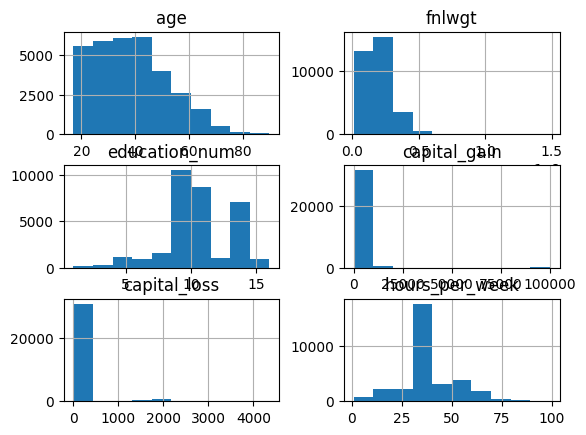

In [10]:
adult_df.hist()

### Feature engineering

Workclass

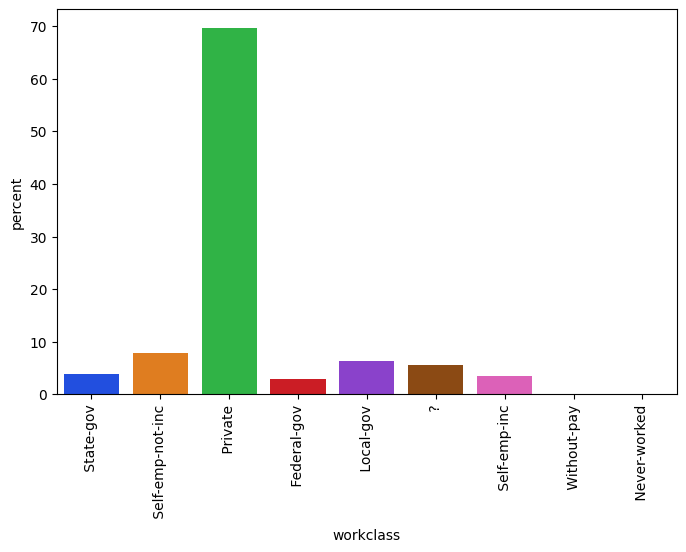

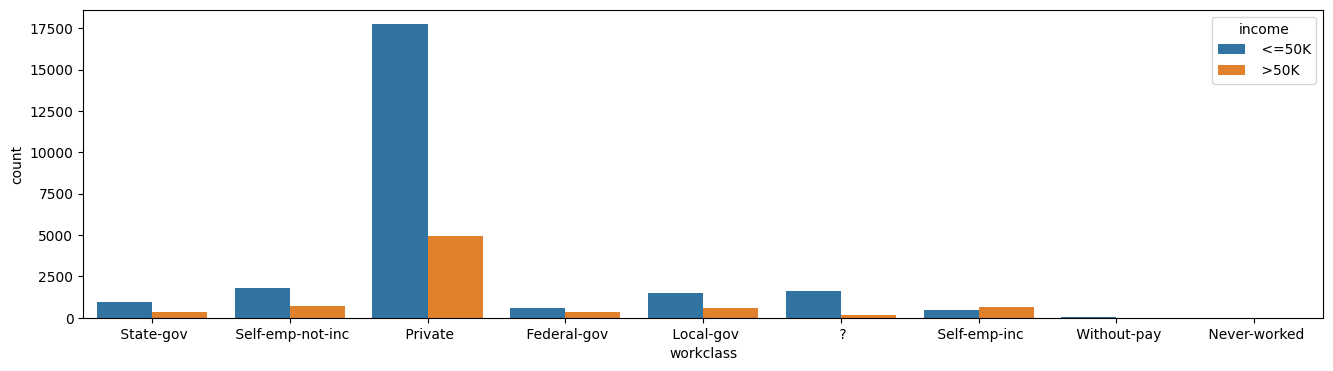

In [11]:
import seaborn as sns
# Seaborn has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=adult_df, x="workclass", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

plt.figure(figsize=(16, 4))
sns.countplot(data=adult_df, x='workclass', hue='income')
plt.show()

Most of the people working in private class.
MOst of the working class having lower income.

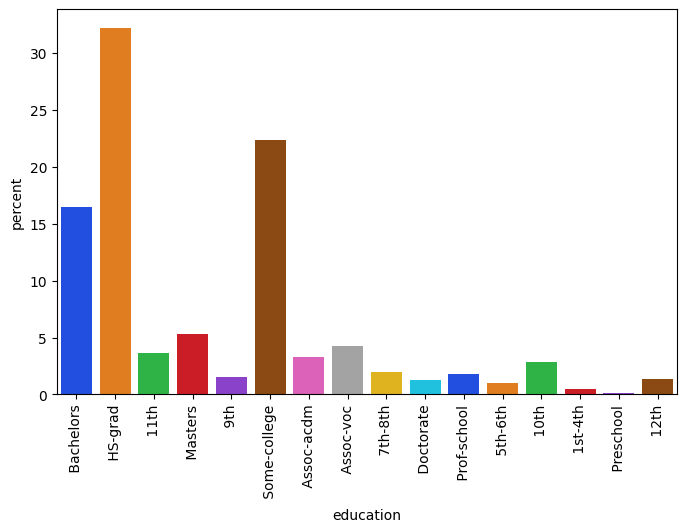

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=adult_df, x="education", stat="percent", hue="education", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

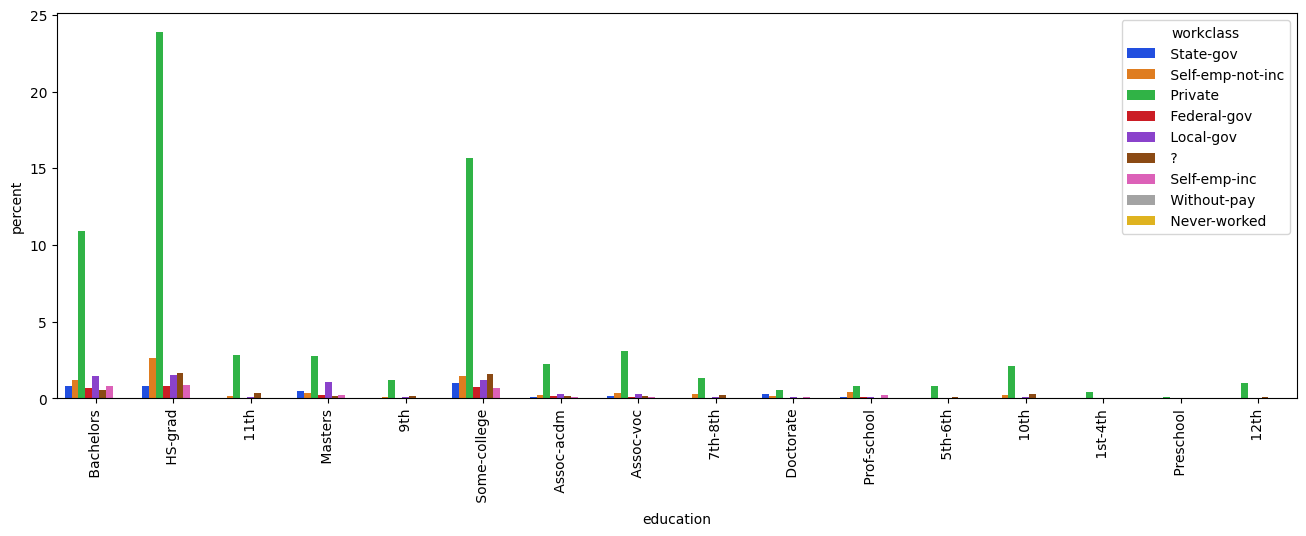

In [13]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.countplot(data=adult_df, x="education", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

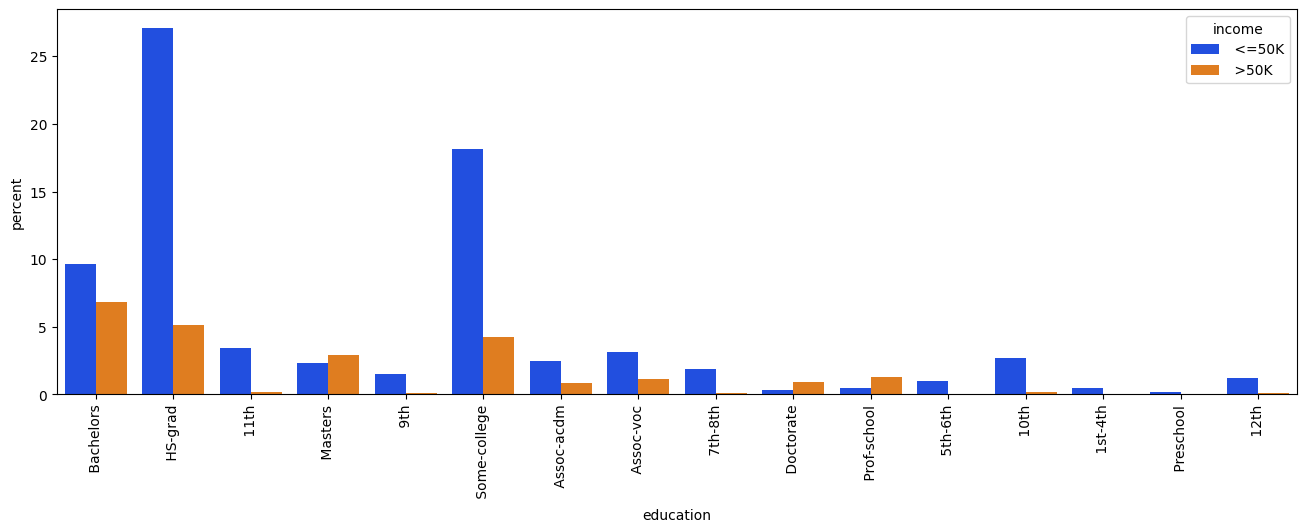

In [14]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.countplot(data=adult_df, x="education", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Majority of the workclass from different education groups work in the private sector.
Masters and Doctorates are very highly paid compared to all other education levels.
Most lower income people are either dropouts or high school grads.

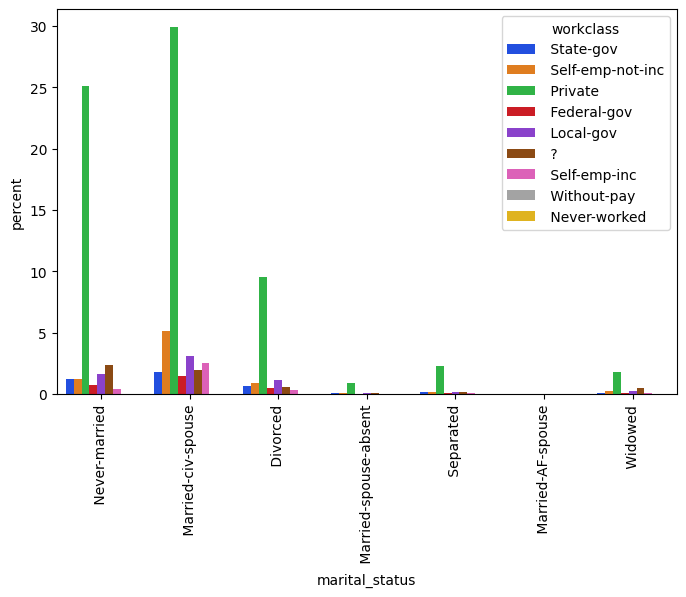

In [15]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=adult_df, x="marital_status", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

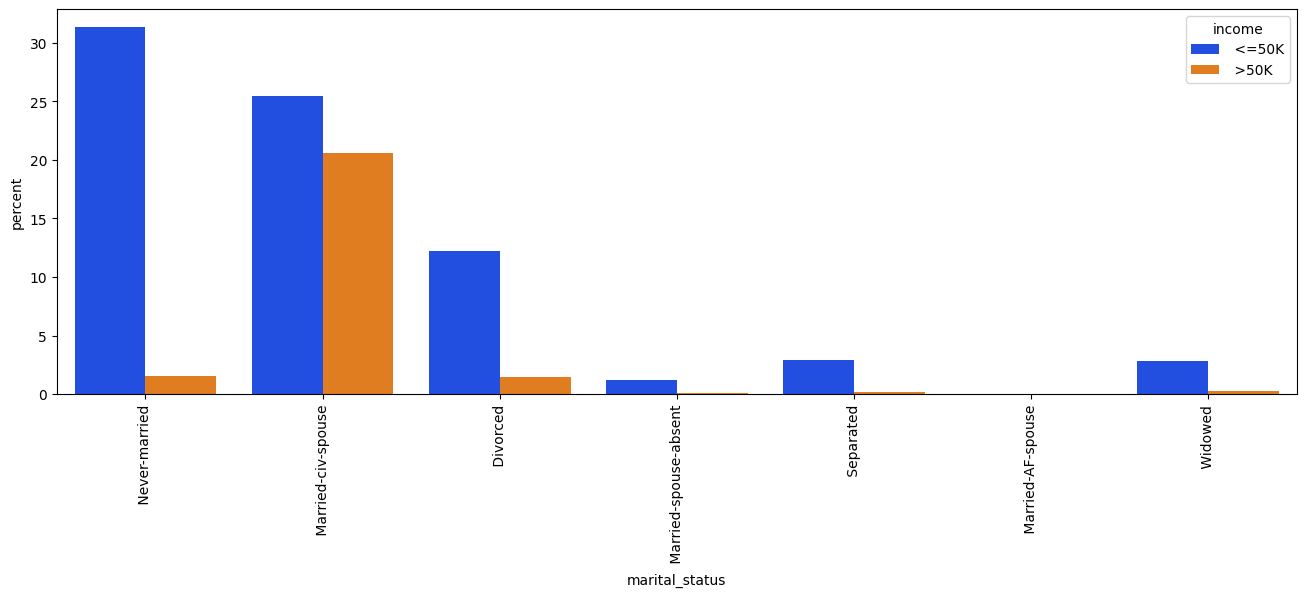

In [16]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.countplot(data=adult_df, x="marital_status", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Most of the married are working in private with high income.

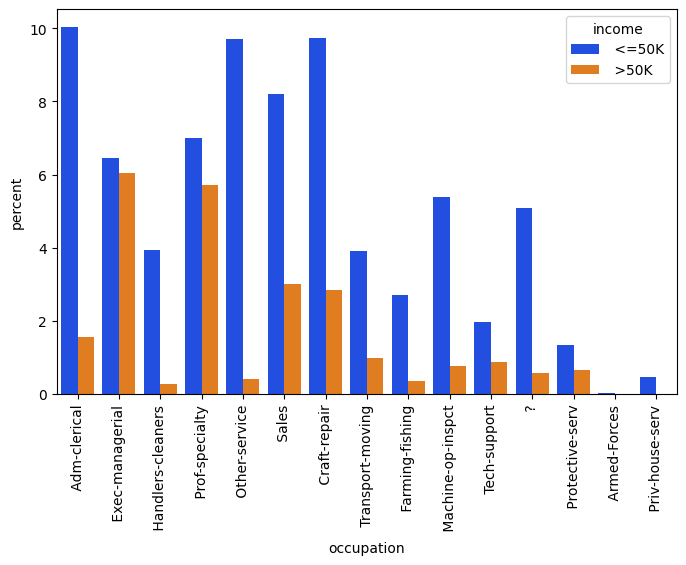

In [17]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=adult_df, x="occupation", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Majority of the adults work in the prof-specialty, craft-repair, adm-clerical, exec-managerial, sales and other-services occupation.
prof-specialty and exec-managerial are having high income.

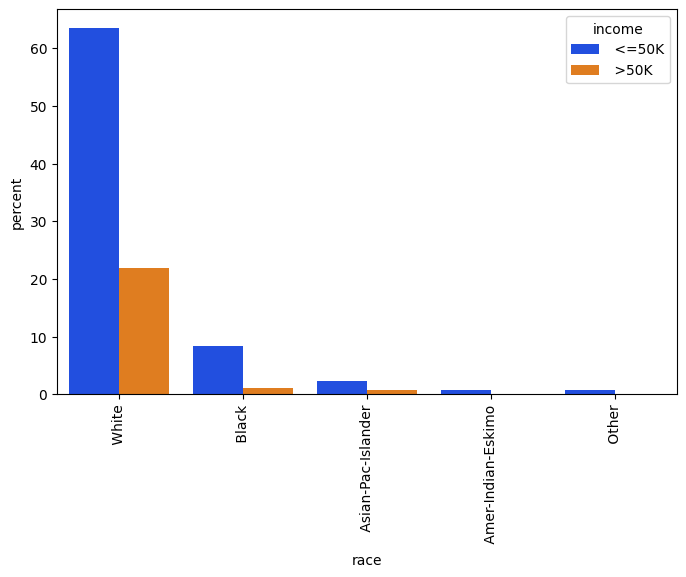

In [18]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=adult_df, x="race", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

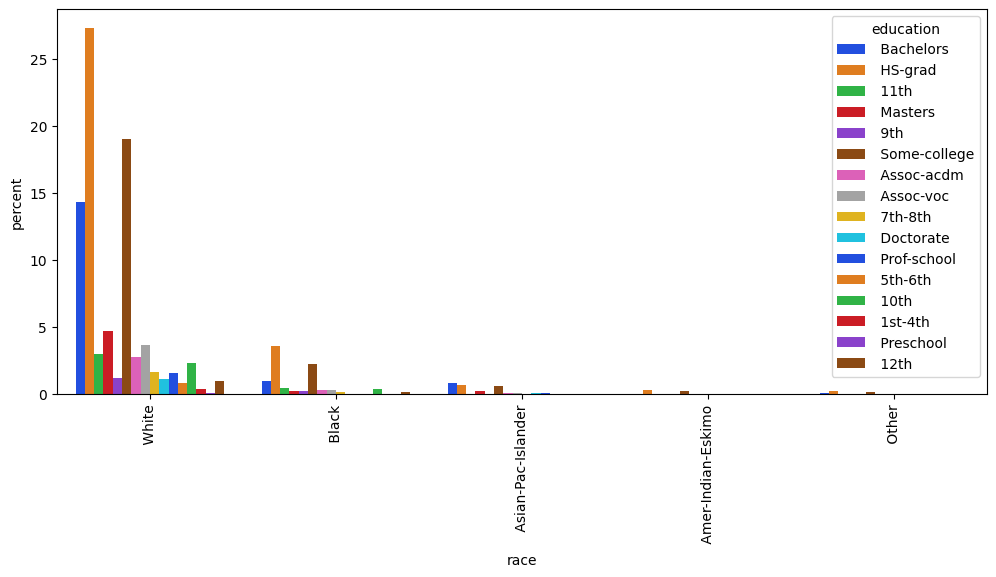

In [19]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(data=adult_df, x="race", stat="percent", hue="education", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

In the dataset a high proportion of educated and workclass whites.

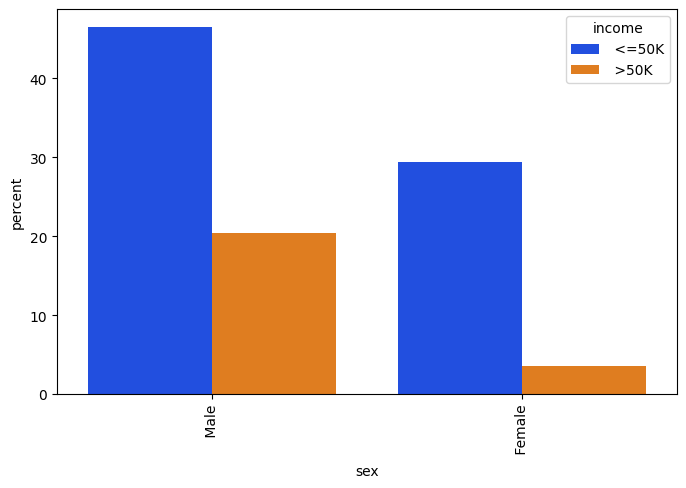

In [20]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=adult_df, x="sex", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Males in both income groups earn significantly more than the females respectively.

<Axes: xlabel='hours_per_week_range', ylabel='count'>

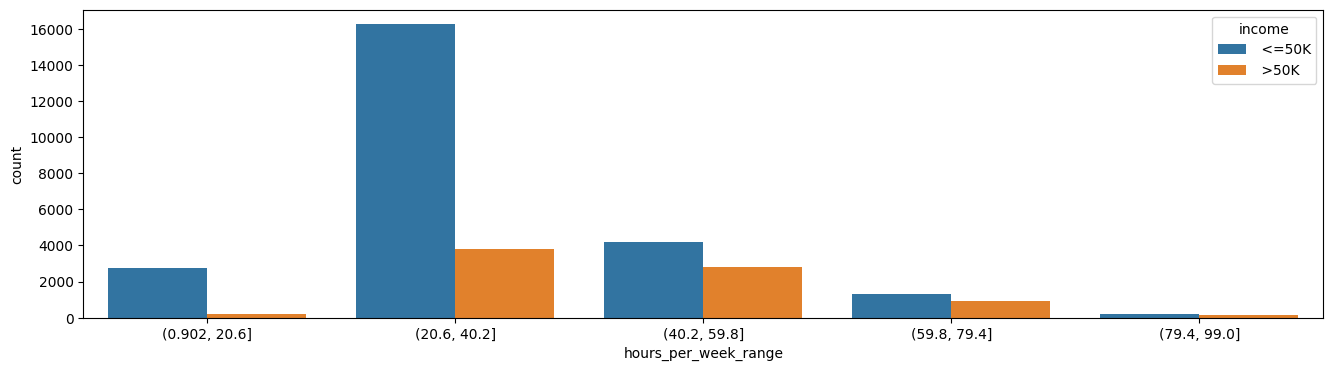

In [21]:
adult_df['hours_per_week_range']= pd.cut(adult_df['hours_per_week'], 5)

plt.figure(figsize=(16,4))
sns.countplot(data=adult_df, x='hours_per_week_range', hue='income')

PEople with high ncome works 20-60hrs per week.

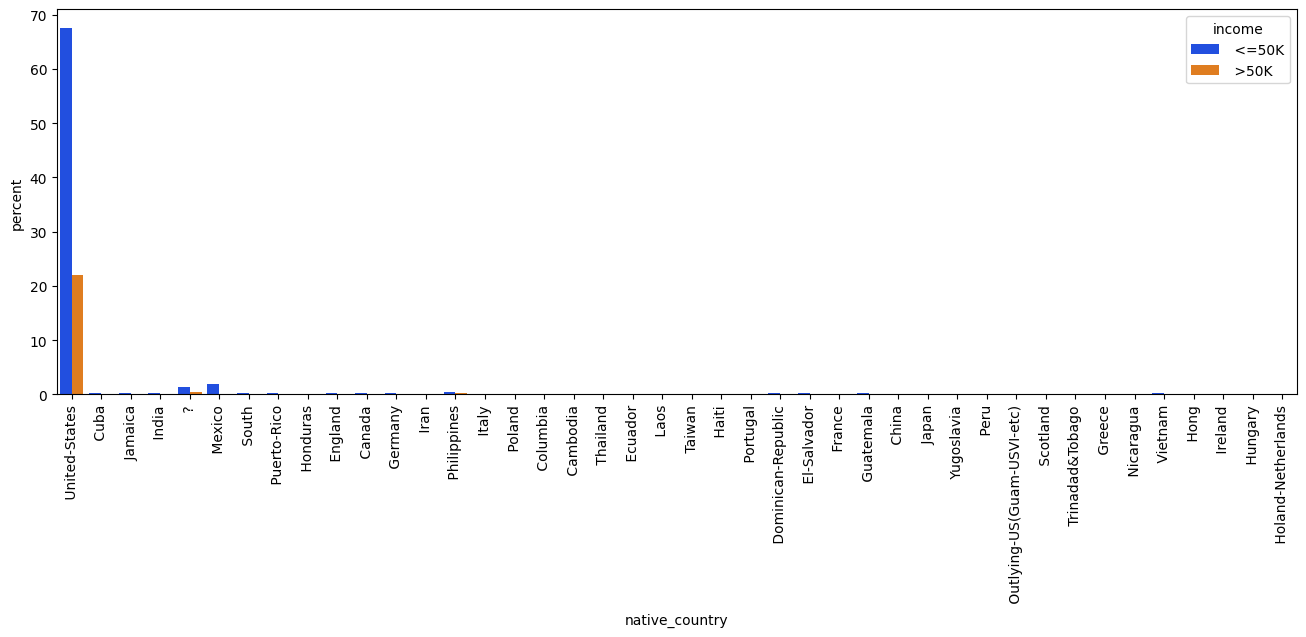

In [22]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.countplot(data=adult_df, x="native_country", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

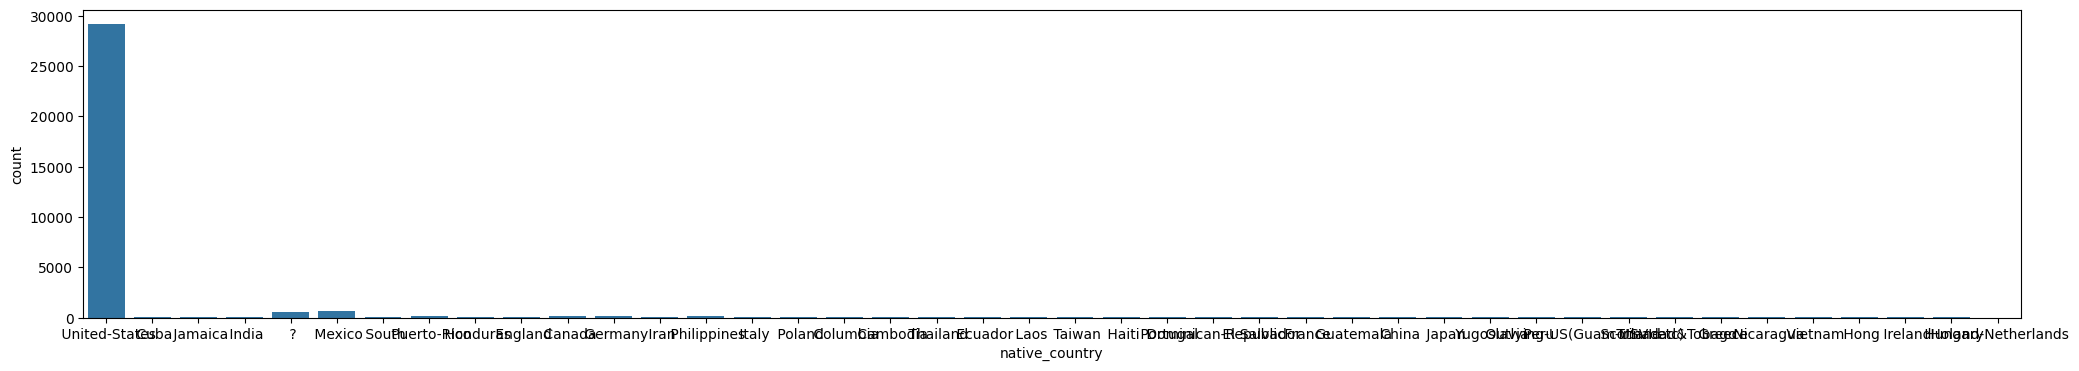

In [23]:
plt.figure(figsize=(25, 4))
sns.countplot(data=adult_df, x='native_country')
plt.show()

Data set contains more people from US there for higher earning count is showing more.

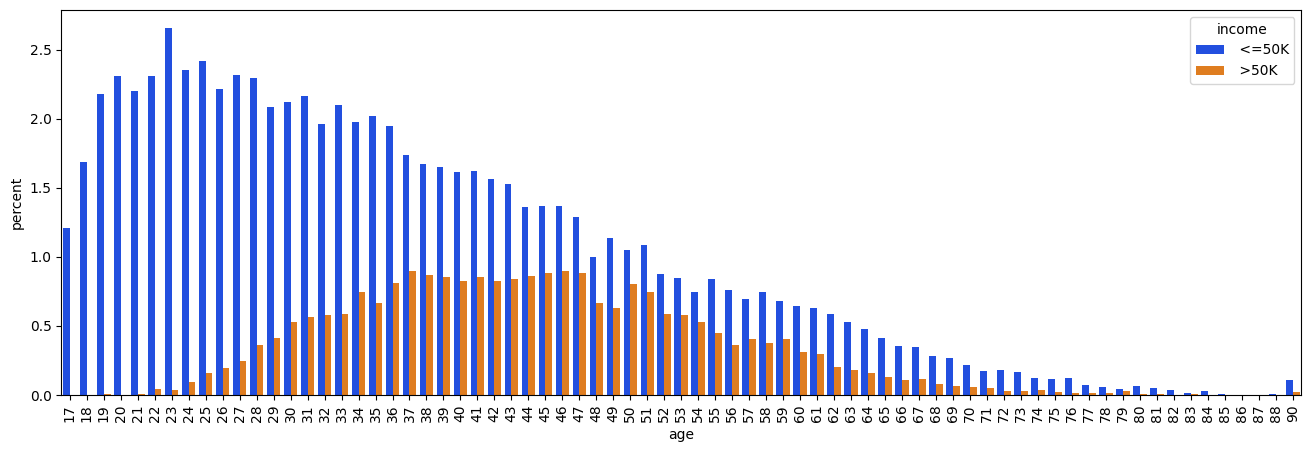

In [24]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.countplot(data=adult_df, x="age", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

30-50yrs are earning more comparing to other age category.
Youngsters are paid much lower comparing to middle aged.

### Feature Selection
 'education' and 'educational-num' these 2 features convey the same meaning, so remove the categorical education attribute.
Use the categorical Hours work column and drop the 'hour-per-week' column. 'Fnlwgt' attribute not giving much information comparing to other fetures so dropping that also. combine capital loss and gain.

In [25]:
adult_df_featured = adult_df.drop(['education', 'hours_per_week', 'fnlwgt','hours_per_week_range'], axis=1)
outliers = adult_df[adult_df['capital_gain'] > 40000].index
adult_df_featured.drop(outliers, inplace=True)
adult_df_featured['capital_gain']= adult_df.apply(lambda x: x['capital_gain'] - x['capital_loss'], axis=1)
adult_df_featured = adult_df_featured.drop(columns='capital_loss')


PPS (Predictive Power Score)

In [30]:
import ppscore as pps

<Axes: >

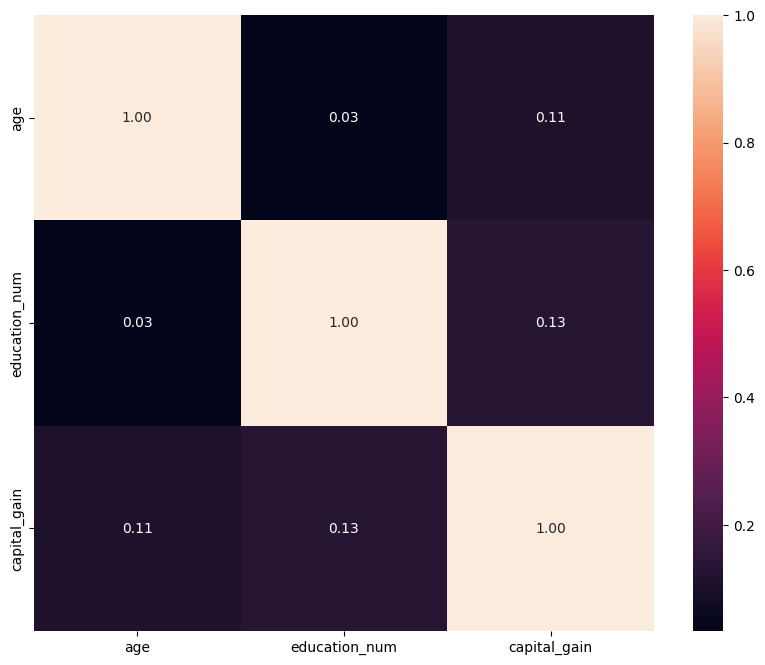

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(adult_df_featured.corr(),annot=True,fmt=".2f")


In [55]:
pps.matrix(adult_df_featured)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,1.053423e-02,classification,True,weighted F1,0.574118,0.578604,DecisionTreeClassifier()
2,age,education_num,0.000000e+00,regression,True,mean absolute error,1.891200,1.927582,DecisionTreeRegressor()
3,age,marital_status,3.251827e-01,classification,True,weighted F1,0.342600,0.556375,DecisionTreeClassifier()
4,age,occupation,3.760604e-02,classification,True,weighted F1,0.088200,0.122489,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
116,income,race,1.678227e-07,classification,True,weighted F1,0.771752,0.771752,DecisionTreeClassifier()
117,income,sex,0.000000e+00,classification,True,weighted F1,0.560000,0.536579,DecisionTreeClassifier()
118,income,capital_gain,0.000000e+00,regression,True,mean absolute error,738.659000,1066.216693,DecisionTreeRegressor()
119,income,native_country,2.254007e-07,classification,True,weighted F1,0.843101,0.843101,DecisionTreeClassifier()


<Axes: xlabel='x', ylabel='ppscore'>

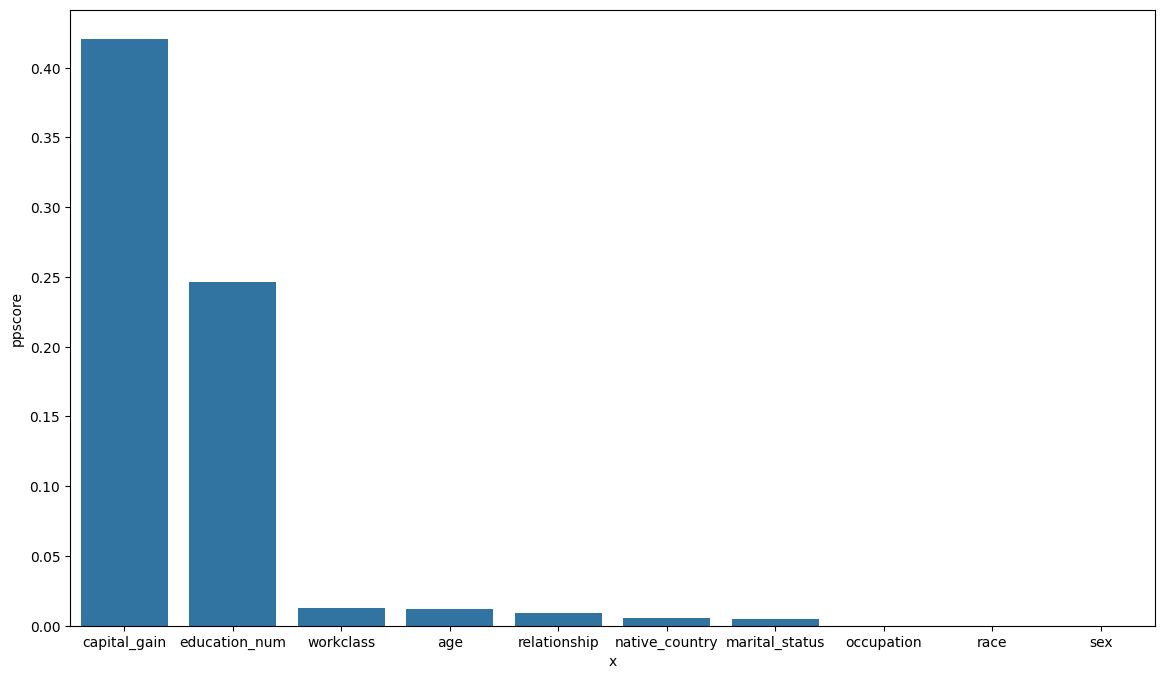

In [52]:
import seaborn as sns
predictors_df = pps.predictors(adult_df_featured, y="income")
predictors_df
plt.figure(figsize=(14,8))
sns.barplot(data=predictors_df,x='x', y="ppscore")

<Axes: xlabel='x', ylabel='y'>

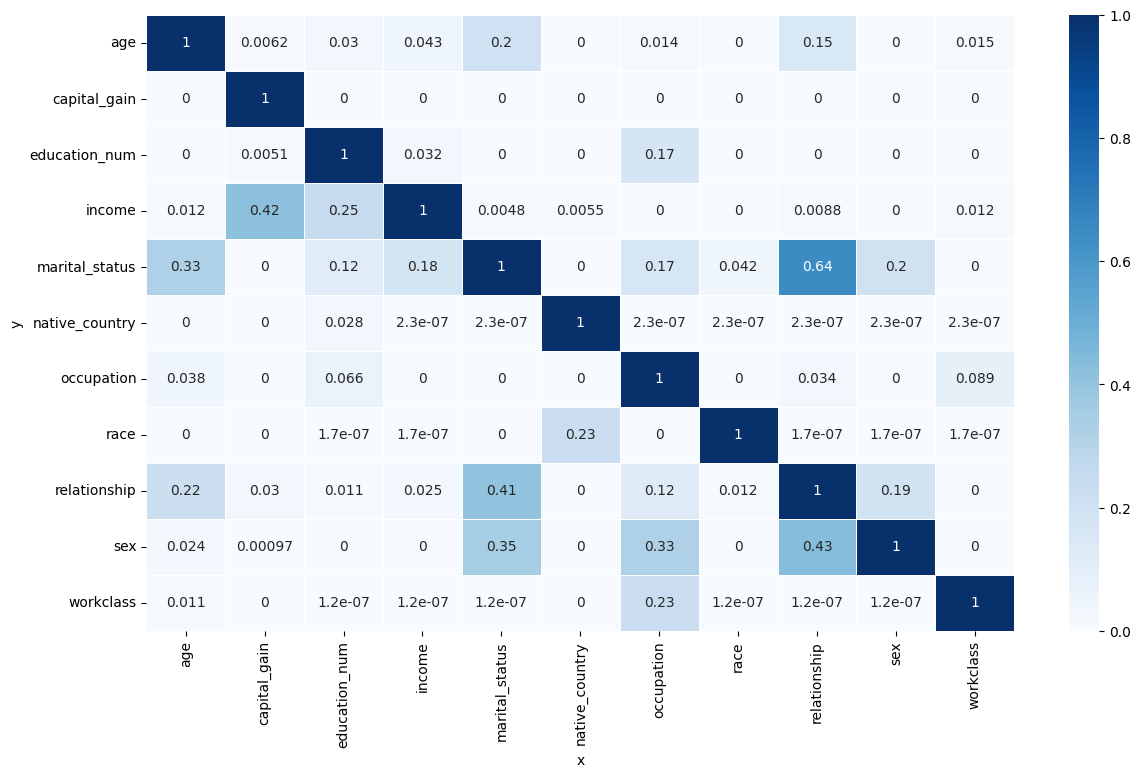

In [53]:
plt.figure(figsize=(14,8))
matrix_df = pps.matrix(adult_df_featured)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

The score always ranges from 0 to 1 and is data-type agnostic.
A score of 0 means that the column x cannot predict the column y better than a naive baseline model.
A score of 1 means that the column x can perfectly predict the column y given the model.
A score between 0 and 1 states the ratio of how much potential predictive power the model achieved compared to the baseline model.

This dataset capital gain and education have a contribution to predict income.

### Encoding Techniques

In [26]:
df = adult_df_featured.select_dtypes(include='object')
result = df.apply(pd.Series.unique)
result

workclass         [ State-gov,  Self-emp-not-inc,  Private,  Fed...
marital_status    [ Never-married,  Married-civ-spouse,  Divorce...
occupation        [ Adm-clerical,  Exec-managerial,  Handlers-cl...
relationship      [ Not-in-family,  Husband,  Wife,  Own-child, ...
race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
sex                                                [ Male,  Female]
native_country    [ United-States,  Cuba,  Jamaica,  India,  ?, ...
income                                              [ <=50K,  >50K]
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
adult_df_encoded = adult_df_featured.copy()
le = LabelEncoder()
dict_keys = result.keys()
indx = 0
for items in result:
  if len(items) >5:
    column = dict_keys[indx]
    adult_df_encoded[column] = le.fit_transform(adult_df_featured[column])
    label_encoders[column] = le
  indx = indx + 1
adult_df_encoded = pd.get_dummies(adult_df_featured)

**One-hot encoding:**

**Pros:**

**No Ordinal Relationship:** One-hot encoding does not imply any ordinal relationship between categories.
**Compatibility:** Works well with many machine learning algorithms, especially those that assume input features are on a comparable scale, like linear regression and neural networks.
**Handles New Categories**: When used in conjunction with feature engineering techniques, one-hot encoding can handle the appearance of new categories.

**Cons:**

**High Dimensionality:**  For features with a large number of categories, one-hot encoding can create a large number of new binary features, leading to high-dimensional data. This can increase computational cost and memory usage.

**Sparse Matrix**: The resulting matrix from one-hot encoding is sparse (contains many zeros), which might not be efficient for some algorithms and can lead to slower training times.
**Overfitting Risk:** High dimensionality can lead to overfitting, especially with small datasets where the number of features can become comparable to or larger than the number of samples.

**Label Encoding**

**Pros:**

**Simplicity:** Easy to implement and understand, requiring minimal computational resources.
**Efficiency**: Converts categorical values into numerical values quickly and without creating additional columns, making it memory-efficient.
**Suitable for Ordinal Data:** Ideal for ordinal categorical features where there is a meaningful order or ranking among categories.

**Cons:**


**Implied Ordinality:** Label encoding introduces an ordinal relationship between categories, which may not be appropriate for nominal categorical features. Algorithms may misinterpret the ordinal nature and treat categories as ordered, leading to incorrect model assumptions and predictions.
**Limited Applicability:** Not suitable for algorithms that are sensitive to how numerical values relate to each other (e.g., distance-based algorithms) when applied to non-ordinal data.
**Potential Bias:** The integer encoding can introduce unintended bias, especially if the encoded values are used directly without further processing, potentially affecting model performance.

Use One-Hot Encoding When The categorical variable is nominal,the number of unique categories is relatively small,the algorithm benefits from a binary representation of categorical variables (e.g., neural networks, linear models),you want to avoid any implicit ordinality in the encoded data.

Use Label Encoding when the categorical variable is ordinal (has a meaningful order),for a large number of categories, and one-hot encoding would result in high-dimensional data,the algorithm can handle ordinal relationships or when the encoded values are used for tree-based methods (e.g., decision trees, random forests) which can handle categorical data directly.


In [28]:
from sklearn.preprocessing import StandardScaler
# Create the StandardScaler object
scaler = StandardScaler()
scaled_data_std = scaler.fit_transform(adult_df_encoded)
scaled_data_std

array([[ 0.03349532,  1.14353019,  0.64502418, ..., -0.02222771,
         0.55748154, -0.55748154],
       [ 0.83988079,  1.14353019, -0.19365171, ..., -0.02222771,
         0.55748154, -0.55748154],
       [-0.03981245, -0.41596043, -0.19365171, ..., -0.02222771,
         0.55748154, -0.55748154],
       ...,
       [ 1.42634296, -0.41596043, -0.19365171, ..., -0.02222771,
         0.55748154, -0.55748154],
       [-1.21273679, -0.41596043, -0.19365171, ..., -0.02222771,
         0.55748154, -0.55748154],
       [ 0.98649633, -0.41596043,  5.60223908, ..., -0.02222771,
        -1.79378138,  1.79378138]])

Standard scaling is ideal when the features in the data are normally distributed (Gaussian distribution).Algorithms Sensitive to Feature Scales.
When features have different units or scales, standard scaling makes the feature values comparable. Algorithms that rely on gradient descent optimization benefit from standard scaling as it helps in achieving faster convergence.

In [29]:
from sklearn.preprocessing import MinMaxScaler
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(adult_df_encoded)

print("Min-Max Scaled Data:\n", scaled_data)

Min-Max Scaled Data:
 [[0.30136986 0.8        0.16982653 ... 0.         1.         0.        ]
 [0.45205479 0.8        0.11328704 ... 0.         1.         0.        ]
 [0.28767123 0.53333333 0.11328704 ... 0.         1.         0.        ]
 ...
 [0.56164384 0.53333333 0.11328704 ... 0.         1.         0.        ]
 [0.06849315 0.53333333 0.11328704 ... 0.         1.         0.        ]
 [0.47945205 0.53333333 0.5040181  ... 0.         0.         1.        ]]


Min-Max Scaling (Normalization)
Min-max scaling transforms the data to fit within a specific range, typically [0, 1].
Min-max scaling is suitable for algorithms that are sensitive to the magnitude of the data and require features to be within a specific range.
Algorithms that compute distances (e.g., Euclidean distance) between data points perform better when features are within a similar range.
Min-max scaling preserves the sparsity in data and is useful for algorithms that handle sparse data efficiently.
When the features naturally fall within a fixed range (e.g., pixel values in images ranging from 0 to 255), min-max scaling is appropriate to normalize the data.